In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from Bio.Phylo._io import parse
from Bio.Phylo.BaseTree import Tree as BioTree, Clade as BioClade
from tqdm import tqdm
from matplotlib_venn import venn3

from src.distribution_analysis.clade import Clade, CladeSplit
from src.distribution_analysis.process_tree import get_clades, get_branches_per_clade

In [9]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [10]:
REFERENCE_TREE_FILE = Path("/Users/tobiaochsner/Documents/Thesis/Validation/data/beast/yule-10-0.trees")
SAMPLE_TREES_FILE = Path("/Users/tobiaochsner/Documents/Thesis/CCD/test.trees")
NUM_TAXA = 10

In [11]:
ref_trees: list[BioTree] = list(parse(REFERENCE_TREE_FILE, "nexus"))
sample_trees: list[BioTree] = list(parse(SAMPLE_TREES_FILE, "nexus"))

In [12]:
taxa_names = [
    terminal.name for terminal in ref_trees[0].get_terminals()
]

In [35]:
from src.utils.tree_utils import get_tree_height


ref_tree_heights = [
    get_tree_height(tree)
    for tree in ref_trees
]
sample_tree_heights = [
    get_tree_height(tree)
    for tree in sample_trees
]

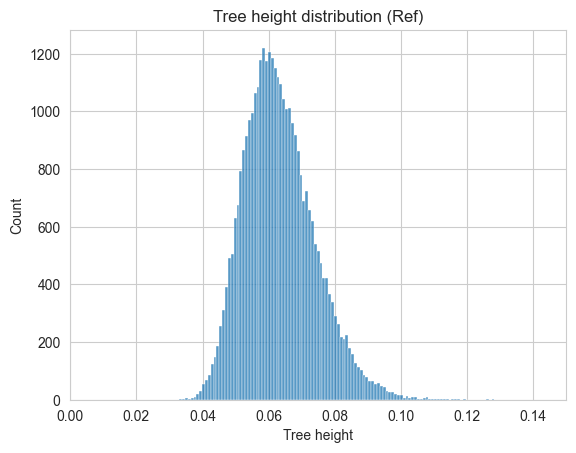

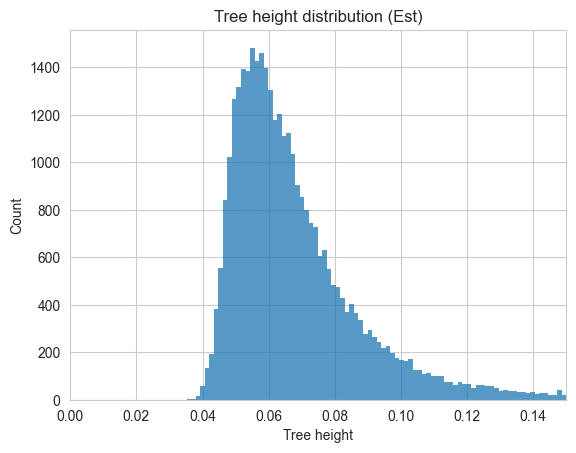

In [36]:
sns.histplot(
    ref_tree_heights,
)
plt.xlim([0, 0.15])
plt.xlabel("Tree height")
plt.title("Tree height distribution (Ref)")
plt.show()

sns.histplot(
    sample_tree_heights,
)

plt.xlim([0, 0.15])
plt.xlabel("Tree height")
plt.title("Tree height distribution (Est)")
plt.show()

In [13]:
ref_clades, ref_clade_splits = get_clades(ref_trees, taxa_names)
sample_clades, sample_clade_splits = get_clades(sample_trees, taxa_names)

100%|██████████| 34976/34976 [00:00<00:00, 86975.53it/s]


In [7]:
df_ref_clade_branches = get_branches_per_clade(ref_clades)
df_sample_clade_branches = get_branches_per_clade(sample_clades)

100%|██████████| 664544/664544 [00:00<00:00, 2208720.74it/s]


In [14]:
df_ref_clade_branches.describe()

,left_branch,right_branch,min_branch,max_branch
count,3.150090e+05,3.150090e+05,3.150090e+05,3.150090e+05
mean,1.387369e-02,2.246806e-02,1.068820e-02,2.565355e-02
std,1.416116e-02,2.216634e-02,1.222035e-02,2.162172e-02
min,2.923678e-08,2.923678e-08,2.923678e-08,2.923678e-08
25%,2.757644e-03,3.596235e-03,2.242390e-03,5.665635e-03
50%,7.689994e-03,1.154185e-02,5.735506e-03,2.022596e-02
75%,2.418582e-02,4.096733e-02,1.333832e-02,4.254489e-02
max,8.867450e-02,1.282626e-01,8.867450e-02,1.282626e-01


In [15]:
df_sample_clade_branches.describe()

,left_branch,right_branch,min_branch,max_branch
count,3.147840e+05,3.147840e+05,3.147840e+05,3.147840e+05
mean,1.497166e-02,2.438227e-02,1.129813e-02,2.805581e-02
std,1.987717e-02,3.149109e-02,1.709212e-02,3.159936e-02
min,1.030546e-08,2.840163e-07,1.030546e-08,5.270898e-07
25%,2.703735e-03,3.691090e-03,2.123552e-03,6.743269e-03
50%,7.813614e-03,1.117545e-02,6.004844e-03,2.517642e-02
75%,2.822877e-02,4.065120e-02,1.436182e-02,4.275801e-02
max,3.671462e+00,3.763937e+00,3.671462e+00,3.763937e+00


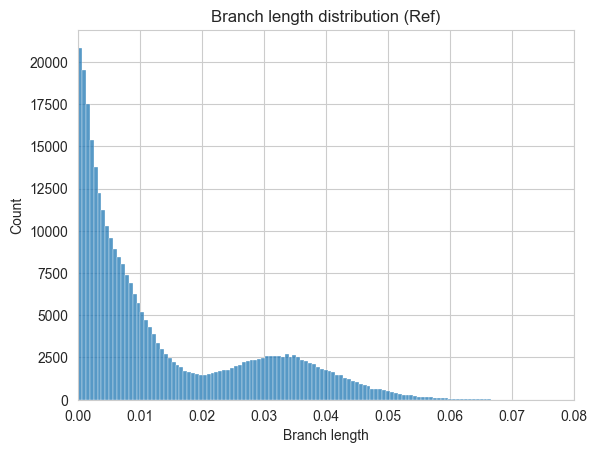

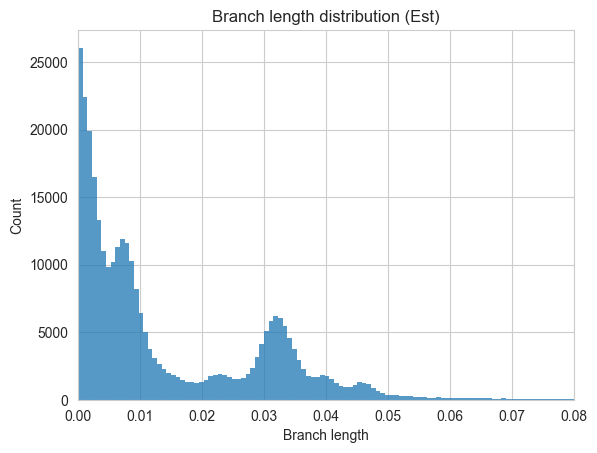

In [39]:
sns.histplot(
    df_ref_clade_branches,
    x="left_branch",
)
plt.xlim([0, 0.08])
plt.xlabel("Branch length")
plt.title("Branch length distribution (Ref)")
plt.show()

sns.histplot(
    df_sample_clade_branches,
    x="left_branch",
)

plt.xlim([0, 0.08])
plt.xlabel("Branch length")
plt.title("Branch length distribution (Est)")
plt.show()